# Importing the required libraries

In [92]:
#!pip install plotly
# !pip install sort-dataframeby-monthorweek
# !pip install sorted_months_weekdays

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sort_dataframeby_monthorweek as sm
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [94]:
df = pd.read_csv('hotel_bookings.csv')

In [95]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [96]:
df.shape

(119390, 32)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### There are total 32 variables(categorical and continuous) with one dependent variable(categorical) *is_cancelled*

# Data cleaning

In [98]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [99]:
# Dropping columns having high number of missing values
df = df.drop(columns = ['agent','company'],axis=1)

In [100]:
# country has got 488 rows with null values, so we just replace these null values with Unknown
df = df.fillna({'country':'Unknown'})

In [101]:
# Coverting reservation_status_date into a datetime data type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [102]:
df.describe(include='object')

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  119390         119390   
unique           2                 12       5     178              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status  
count        119390        119390             119390  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104641         89613              75166

In [103]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('-'*60)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'M

In [104]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    119390.000000         119390.000000  119390.000000   
mean          0.221124              2.321149     101.831122   
std           0.652306             17.594721      50.535790   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      69.290000   
50%           0.000000              0.000000      94.575000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

### ADR has max value of 5400 which is extremely high, probably it's an outlier

<Axes: >

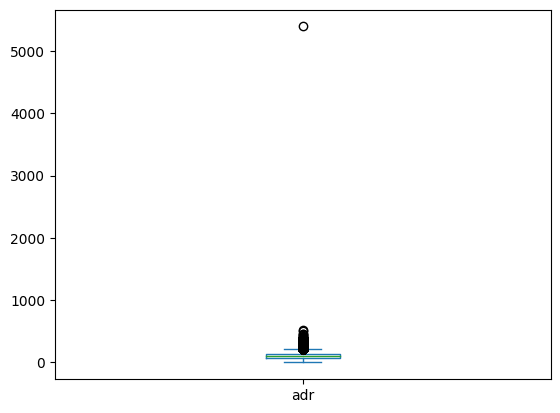

In [105]:
df['adr'].plot(kind='box')

### As we can observe that there is just one data point that is above 5000, which is an outlier. So we can just remove this outlier

In [106]:
df = df[df['adr']<5000]

# Exploratory Data Analysis (EDA)

In [107]:
df['is_canceled'].value_counts(normalize=True)

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

In [108]:
df['is_canceled'].value_counts()

0    75166
1    44223
Name: is_canceled, dtype: int64

- ### 44223 bookings were canceled which is around 37%

In [109]:
df['country'].value_counts(normalize=True)

PRT    0.406981
GBR    0.101592
FRA    0.087236
ESP    0.071765
DEU    0.061036
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 178, dtype: float64

- ### Out of the total bookings 40% of the bookings were booked by guests from Portugal.

In [110]:
df['arrival_date_month'].value_counts(normalize=True)*100

August       11.623349
July         10.604830
May           9.876119
October       9.347595
April         9.288125
June          9.162486
September     8.801481
March         8.202598
February      6.757742
November      5.690642
December      5.678915
January       4.966119
Name: arrival_date_month, dtype: float64

- ### August has been the most busy month with 11.6% bookings followed by July (10.6%) and May (9.87%)

In [111]:
df['market_segment'].value_counts(normalize=True)*100

Online TA        47.305028
Offline TA/TO    20.284951
Groups           16.593656
Direct           10.558762
Corporate         4.435082
Complementary     0.622335
Aviation          0.198511
Undefined         0.001675
Name: market_segment, dtype: float64

- ### Around 47% of the bookings were made via Online Travel Agencies and around 20% of the bookings were made via offline Travel Agencies. Less than 20% of the bookings were direct

In [112]:
df['customer_type'].value_counts(normalize=True)

Transient          0.750588
Transient-Party    0.210438
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

- ### Transient type customers have done majority of bookings 

In [113]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.629589
Canceled     0.360301
No-Show      0.010110
Name: reservation_status, dtype: float64

- ### Around 63% of guests were checked out and 36% of guests had canceled the booking

# Data Visualization

In [114]:
fig = px.bar(df,x=['Not canceled','canceled'],y=df['is_canceled'].value_counts(normalize=True)*100,template='plotly_dark',title='Bookings Status Count')
fig.update_layout(xaxis_title='Bookings Status',yaxis_title='Percentage of bookings')
fig.show()

 - ### Majority of the bookings weren't canceled 
 - ### More than half of the bookings were canceled, which is still high

In [115]:
fig1 = px.histogram(df,x='hotel',color='is_canceled',barmode='group',template='plotly_dark')
fig1.update_layout(
    title="Cancellation rates in Resort and City Hotels",
    title_font=dict(size=20),
    xaxis=dict(title="Hotel"),
    yaxis=dict(title="count")
)
fig1.show()

 - ### Most of the bookings were done in City Hotels
 - ### Cancellation rate of city hotels is high compared to Resort hotels

## How does the prices per night vary across different seasons or months of the year?

In [214]:
df['month'] = df['reservation_status_date'].dt.month
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['month'] = df['month'].map(month_mapping)
df = sm.Sort_Dataframeby_Month(data,'month')

In [215]:
room_prices_monthly = df[df['is_canceled']==0]
months = ["January", "February", "March", "April", "May", "June", 
       "July", "August", "September", "October", "November", "December"]
room_prices_monthly['month'] = pd.Categorical(room_prices_monthly['month'],categories=months,ordered=True)
resort_data = room_prices_monthly[room_prices_monthly['hotel']=='Resort Hotel']
resort_data = pd.DataFrame(resort_data.groupby(['month'])['adr'].mean().reset_index())

city_data = room_prices_monthly[room_prices_monthly['hotel']=='City Hotel']
city_data = pd.DataFrame(city_data.groupby(['month'])['adr'].mean().reset_index())

final_data = resort_data.merge(city_data,on='month')
final_data.columns = ['month','resort_hotel_prices','city_hotel_prices']
plt.figure(figsize=(10,5))
fig = px.line(final_data,x='month',y=['resort_hotel_prices','city_hotel_prices'],title = 'Room price per night over the Months', template = 'plotly_dark')
fig.update_layout(xaxis=dict(
        tickangle=45),
        yaxis_title = 'Prices')
fig.show()

<Figure size 1000x500 with 0 Axes>

- ### The prices of the Resort hotels are more expensive during summers. 
- ### The prices of the City hotels varies less and are  more expensive during spring and summers season.

## Peak booking periods

In [216]:
data_guests = df[df['is_canceled']==0]
data_guests = data_guests[['month','hotel']]

In [217]:
data_resort = data_guests[data_guests['hotel']=='Resort Hotel']
resort_guests = data_resort['month'].value_counts().reset_index()
resort_guests.columns=['month','no_of_guests']
resort_guests

month  no_of_guests
0      August          3268
1        July          2977
2     October          2647
3         May          2546
4       April          2529
5       March          2434
6    February          2240
7   September          2238
8    November          2157
9     January          2090
10       June          2032
11   December          1780

In [218]:
data_city = data_guests[data_guests['hotel']=='City Hotel']
city_guests = data_city['month'].value_counts().reset_index()
city_guests.columns=['month','no_of_guests']
city_guests

month  no_of_guests
0      August          5293
1        July          4760
2         May          4620
3   September          4489
4     October          4351
5        June          4334
6       April          4000
7       March          3976
8    February          2900
9    November          2882
10    January          2530
11   December          2093

In [219]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no_of_guests_in_resort','no_of_guests_in_city_hotel']
final_guests

month  no_of_guests_in_resort  no_of_guests_in_city_hotel
0      August                    3268                        5293
1        July                    2977                        4760
2     October                    2647                        4351
3         May                    2546                        4620
4       April                    2529                        4000
5       March                    2434                        3976
6    February                    2240                        2900
7   September                    2238                        4489
8    November                    2157                        2882
9     January                    2090                        2530
10       June                    2032                        4334
11   December                    1780                        2093

In [220]:
final_guests = sm.Sort_Dataframeby_Month(final_guests,'month')
final_guests

month  no_of_guests_in_resort  no_of_guests_in_city_hotel
0     January                    2090                        2530
1    February                    2240                        2900
2       March                    2434                        3976
3       April                    2529                        4000
4         May                    2546                        4620
5        June                    2032                        4334
6        July                    2977                        4760
7      August                    3268                        5293
8   September                    2238                        4489
9     October                    2647                        4351
10   November                    2157                        2882
11   December                    1780                        2093

In [221]:
px.line(final_guests, x = 'month', y = ['no_of_guests_in_resort','no_of_guests_in_city_hotel'],
        title='Total no. of guests per Month', template = 'plotly_dark')

- ### There are more no. of guests in City Hotels during summers, when the prices are highest
- ### No. of guests in Resort Hotels are higher in spring and summers,when the prices are highest.
- ### Despite of the that both the hotels have fewer guests in November and December

## Cancellation Status of repeated guests

In [229]:
fig = px.histogram(df, x="is_canceled", color="is_repeated_guest", barmode="group",template='plotly_dark')
fig.update_layout(
    title="Canceled or not",
    title_font=dict(size=20),
    xaxis=dict(title="Cancellation Status"),
    yaxis=dict(title="Count")
    
)
fig.show()

- ### This plot clearly shows that most of the repeated guests don't cancel their bookings but there are some exceptions.

## Cancellation Status per month

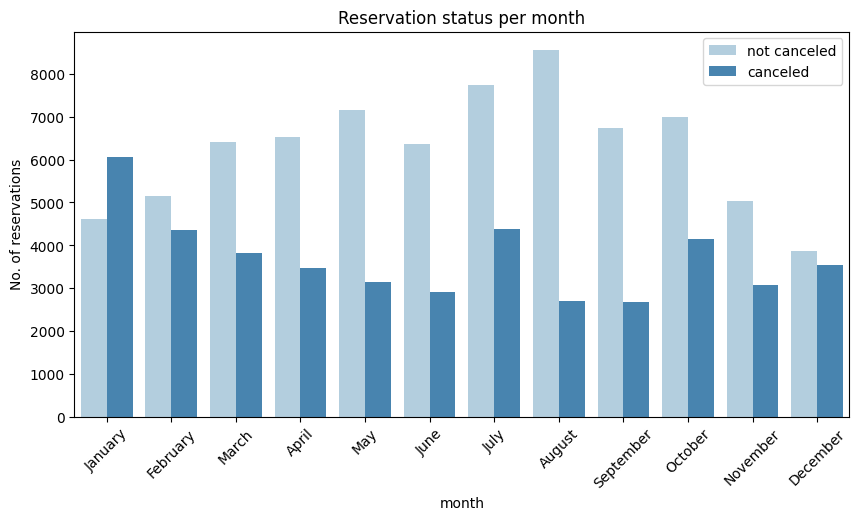

In [228]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='month',hue='is_canceled',data=df,palette='Blues')
plt.title('Reservation status per month')
plt.xlabel('month')
plt.ylabel('No. of reservations')
plt.xticks(rotation=45)
plt.legend(['not canceled','canceled'])
plt.show()

- ### Both the no. of confirmed reservations and canceled reservations are largest in the month of August
- ### However Janauary is the month with most no. of canceled reservations

## Top 10 countries with reservation canceled

In [224]:
# Assuming the 'df' variable is a pandas DataFrame
canceled_data = df[df['is_canceled'] == 1]
top_10_country = canceled_data['country'].value_counts()[:10].reset_index()
top_10_country.columns = ['country','No. of guests']

fig = px.pie(top_10_country,names='country',values='No. of guests',title='Top 10 countries with reservation canceled',template='simple_white')
fig.update_traces(textposition='inside',textinfo='label+value+percent')
fig.show()

In [225]:
fig = px.choropleth(top_10_country, locations='country',color='No. of guests',
                    title='Top 10 Countries with Bookings Canceled',
                    color_continuous_scale='Viridis',
                    labels={'country': 'Country', 'No. of guests': 'cancellation_count'})

fig.show()

- ### Portugal has got highest cancellation rate 

## Average Daily Rate (ADR) per Month for Canceled Bookings

In [192]:
df['month'] = df['reservation_status_date'].dt.month
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['month'] = df['month'].map(month_mapping)
adr_per_month = pd.DataFrame(df[df['is_canceled']==1].groupby(['month'])[['adr']].sum().reset_index())
adr_per_month = sm.Sort_Dataframeby_Month(adr_per_month,'month')
adr_per_month

month        adr
0     January  571261.17
1    February  447915.76
2       March  424985.36
3       April  425413.23
4         May  391438.08
5        June  359688.89
6        July  482430.62
7      August  325786.93
8   September  275528.33
9     October  331156.87
10   November  281367.90
11   December  319569.53

In [193]:
fig = px.bar(adr_per_month,'month','adr',barmode='group',template='plotly_dark')
fig.update_layout(
    title="Average Daily Rate (ADR) per Month for Canceled Bookings",
    xaxis = dict(title="month",tickangle=-30),
    yaxis_title="Average Daily Rate (ADR) per Month"  
)
fig.show()

- ### This plot clearly shows that cancellations are common when the prices are higher and least common when the prices are lower. The prices are higher in January that leades to high no. of cancelations

## Bookings by market segments

In [230]:
market_segment_data = pd.DataFrame(df['market_segment'].value_counts().reset_index(name='count'))
market_segment_data.columns=['market_segment','Count']
market_segment_data

market_segment  Count
0      Online TA  56477
1  Offline TA/TO  24218
2         Groups  19811
3         Direct  12606
4      Corporate   5295
5  Complementary    743
6       Aviation    237
7      Undefined      2

In [231]:
px.bar(market_segment_data,x='market_segment',y='Count',template='plotly_dark')

In [232]:
distribution_channel_data = pd.DataFrame(df['distribution_channel'].value_counts().reset_index(name='count'))
distribution_channel_data.columns=['distribution_channel','Count']
distribution_channel_data

distribution_channel  Count
0                TA/TO  97869
1               Direct  14645
2            Corporate   6677
3                  GDS    193
4            Undefined      5

In [233]:
px.bar(distribution_channel_data,x='distribution_channel',y='Count',template='plotly_dark')

- ### Both the plots clearly show that most of the bookings are from travel agencies (offline/online)

# Suggestions

- ### Since around 37% of the bookings were canceled, it's important to implement strategies to reduce cancellations. This can include lowering the rates to for specific hotels based on the locations. They can also provide discounts to the customers

- ### As the ratio of cancellation and not cancellation is higher in the resort hotels than in the city hotels. So the hotels should provide resonable prices during weekends or on vacations or holidays.

- ### As the number of cancellations are highest in January, hotels can start their marking with a resonable amount to increase their total revenue.

- ### Implementing marketing campaigns, tailor promotional offers or packages specifically for Portuguese guests, in order to reduce the cancellation rate.